In [1]:
from utils.chat import OllamaChat
from utils.prompts import get_persona
from company_about_summarizer import summarize_company_about
from utils.example_company.company_about import company_data
from utils.example_company.example_customer import example_customer
from utils.example_company.products_data import Products_data
import json
from langGraph import build_sales_workflow
from langgraph.graph import StateGraph, END
from utils.groq_chat import GroqChat
from single_agent_graph import create_sales_graph,process_message


/home/hamza/Desktop/projects/FYP-main/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Summarizing the Company Data

In [2]:
company_data_summarized=summarize_company_about(company_data)


In [3]:
workflow = create_sales_graph()

/home/hamza/Desktop/projects/FYP-main/venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:547: UserWarning: <built-in function any> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


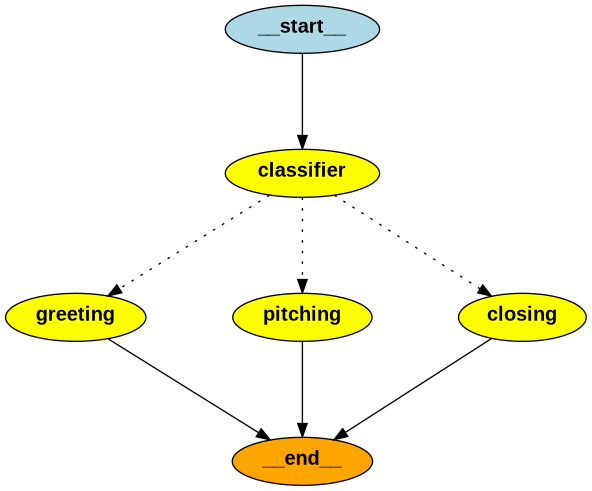

In [4]:
from IPython.display import Image

Image(workflow.get_graph().draw_png())

In [5]:
type(workflow)

langgraph.graph.state.CompiledStateGraph

In [6]:
# Initialize state
state = {
    "messages": [],
    "customer_data": example_customer,
    "current_stage": "greeting",
    "product_info": Products_data["products_and_services"][0],
    "user_prompt": "Hello ?", 
    "interaction_result": None, 
    "company_data": company_data_summarized,
    "next_step": "greeting"

}

state={
    "chat_history":[],
    "current_node":"classifier"

}

In [ ]:
agent_function = workflow.invoke(state)
# state = agent_function(state)


In [7]:
response=process_message(message="hello",history=[],company_data=company_data_summarized,customer_data=example_customer,product_info=Products_data)

In [8]:
response

"Hello, my name is Alex, and I'm a sales representative from TechCare AI. I hope you're doing well today. Are you available to speak for a few minutes?"

In [ ]:
from sales_conversation import SalesConversation